In [1]:
# ==============================
# Standard Library Imports
# ==============================
from enum import Enum
import random

# ==============================
# Third-party Library Imports
# ==============================
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from matplotlib.ticker import MultipleLocator
import numpy as np  # Original numpy
import pennylane as qml
import scipy as sp
from autograd import grad, jacobian
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

# Pennylane numpy
from pennylane import numpy as pnp 

In [2]:
# ==============================
# Import files
# ==============================
import import_ipynb
import Plot_fisher_information as fisher

In [3]:
# ==============================
# Setup for Quantum Computations
# ==============================

# PennyLane settings
dev1 = qml.device('default.qubit', wires = 1)
dev2 = qml.device('default.qubit', wires = 2)
dev3 = qml.device('default.qubit', wires = 3)

# Define Hamiltonian for quantum computations
# H1 = qml.Hamiltonian(coeffs=[-0.5], observables=[qml.PauliZ(0) @ qml.PauliZ(1)])
H1 = qml.Hamiltonian(coeffs=[-0.5], observables=[qml.PauliZ(0)])
H2 = qml.Hamiltonian(coeffs=[-0.5, -0.5], observables=[qml.PauliZ(0), qml.PauliZ(1)])
# H2 = qml.Hamiltonian(coeffs=[-0.5], observables=[qml.PauliZ(0) @ qml.PauliZ(1)])
H3 = qml.Hamiltonian(coeffs=[-0.5, -0.5, -0.5], observables=[qml.PauliZ(0), qml.PauliZ(1), qml.PauliZ(2)])

$$
H_2 = -0.5 \cdot Z_0 - 0.5 \cdot Z_1
$$

$$
Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

$$
H_2 = -0.5 \cdot (Z \otimes I) - 0.5 \cdot (I \otimes Z)
$$

In [4]:
@qml.qnode(dev1)
def circuit_11(phi):
    qml.RY(np.pi/2, wires=0)
    
    # Stage_2: Entangler    
    qml.ApproxTimeEvolution(H1, np.pi/2, 1)
    
    qml.RX(np.pi/2, wires = 0)    

    qml.RY(-np.pi/2, wires = 0)    

    qml.ApproxTimeEvolution(H1, np.pi/2, 1)

    qml.RY(np.pi/2, wires = 0)    
    
    # Stage_3: Accumulator
    qml.ApproxTimeEvolution(H1, phi, 1)
    
    qml.RX(np.pi/(2), wires=0)
    # qml.RY(-np.pi/(2+1e-6), wires=0)
    
    return qml.state()

@qml.qnode(dev2, interface='autograd')
def circuit_22(phi):
    # Stage_1: RY for pi/2
    qml.RY(np.pi/2, wires=0)
    qml.RY(np.pi/2, wires=1)
    
    # Stage_2: Entangler    
    qml.ApproxTimeEvolution(H2, np.pi/2, 1)
    
    qml.RX(np.pi/2, wires = 0)    
    qml.RX(np.pi/2, wires = 1)    

    qml.RY(-np.pi/2, wires = 0)    
    qml.RY(-np.pi/2, wires = 1)   

    qml.ApproxTimeEvolution(H2, np.pi/2, 1)

    qml.RY(np.pi/2, wires = 0)    
    qml.RY(np.pi/2, wires = 1) 
    
    # Stage_3: Accumulator
    qml.ApproxTimeEvolution(H2, phi, 1)
    
    qml.RX(np.pi/(2), wires=0)
    qml.RX(np.pi/(2), wires=1)
    # qml.RY(-np.pi/(2+1e-6), wires=0)
    # qml.RY(-np.pi/(2+1e-6), wires=1)
    
    return qml.state()

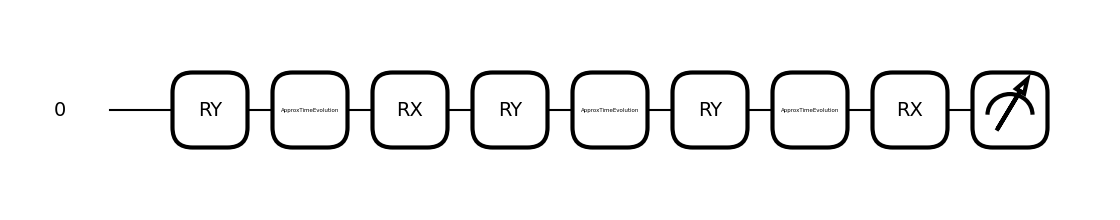

In [5]:
fig, ax = qml.draw_mpl(circuit_11)(np.pi)

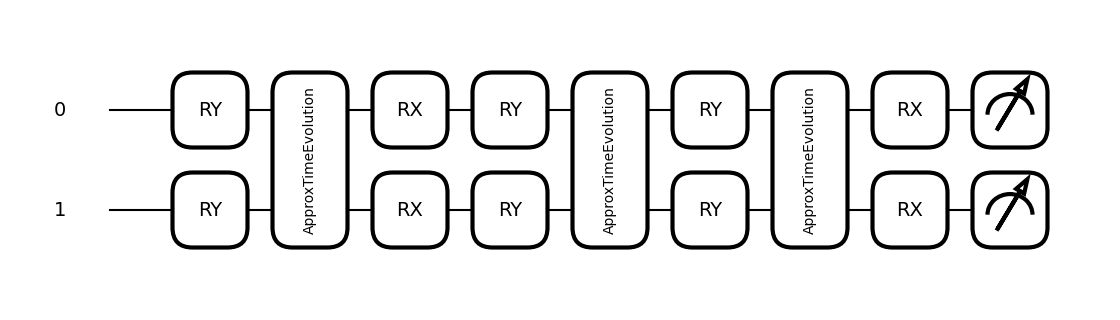

In [6]:
fig, ax = qml.draw_mpl(circuit_22)(np.pi)

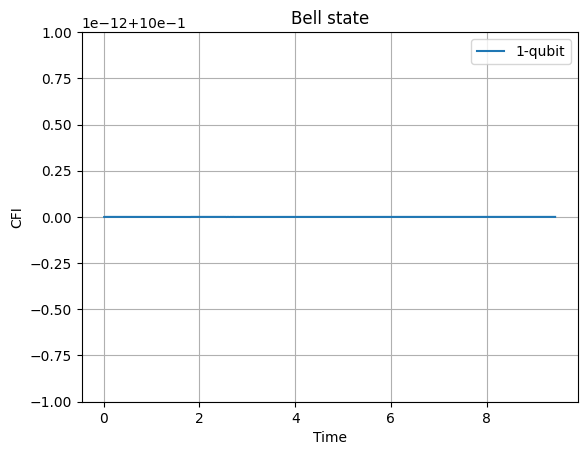

In [7]:
fisher.plot_fisher('classical', 1, circuit_11)

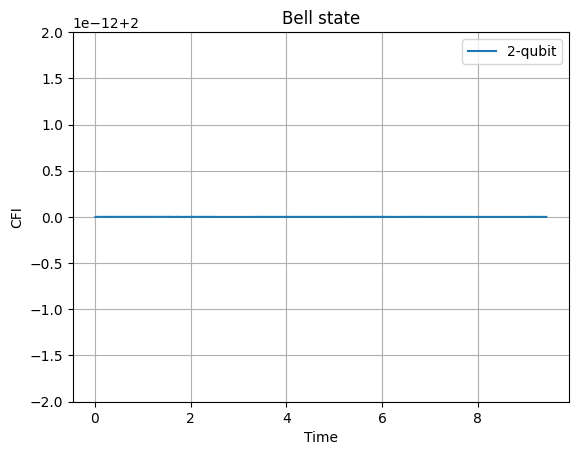

In [8]:
fisher.plot_fisher('classical', 2, circuit_22)